## Temporal Alignment

Align the stock data with news articles based on dates to correlate market movements with news sentiment.

#### import data

In [150]:
import pandas as pd

In [151]:
df_stocks = pd.read_csv('data/stocks/df_stocks.csv', sep=",", index_col=0)
df_text = pd.read_csv('data/textual/df_text_Sentiment.csv', sep=",", index_col=0)


In [152]:
df_stocks['Date'] = pd.to_datetime(df_stocks['Date'])
df_text['date'] = pd.to_datetime(df_text['date'])

In [153]:
df_stocks = df_stocks.sort_values(by='Date', ascending=True)
df_stocks = df_stocks.dropna()

In [154]:
df_stocks.head(2)

,Date,Stock,Open,Low,Close,Adjusted_Close,Volume,Month,Price_Change_Pct,Adjusted_Close_Change
4,2010-01-05,AAPL,7.699643,7.616071,7.656429,6.490199,601904800.0,1,0.172893,0.001729
5,2010-01-05,AMZN,6.774000,6.590500,6.734500,6.734500,177038000.0,1,0.589989,0.005900


In [155]:
df_text.head(2)

,url,softTitle,title,date,author,description,keywords,text,Article Length,Combined Authors,Sentiment Scores,Compound Score,Overall Sentiment,Month-Year,Sentiment Score,Processed Description
0,https://www.cnbc.com/select/best-balance-trans...,11 best balance transfer cards with 0% APR of ...,11 best balance transfer cards with 0% APR of ...,2019-10-15 05:00:00+00:00,"Jason Stauffer,Brett Holzhauer",We analyzed 101 balance transfer cards using a...,"Approved for Apple,Select_Cards,Select_Monetiz...",Who's this for: The Citi Simplicity® Card has ...,1133,"Jason Stauffer,Brett Holzhauer","{'neg': 0.069, 'neu': 0.744, 'pos': 0.187, 'co...",0.6486,Positive,2019-10,0.9995,analyzed balance transfer card using average a...
1,https://www.cnbc.com/select/the-best-credit-ca...,The best credit cards for building credit of J...,The best credit cards for building credit of J...,2019-10-29 15:24:00+00:00,"Benji Stawski,Alexandria White",We analyzed 29 credit cards that are marketed ...,"Select: Credit Cards,Select_Monetized,Credit c...",If you lack a credit history or have poor cred...,1468,"Benji Stawski,Alexandria White","{'neg': 0.06, 'neu': 0.544, 'pos': 0.396, 'com...",0.9072,Positive,2019-10,0.9999,analyzed credit card marketed toward consumer ...


In [156]:
df_text.isnull().sum()

url                        0
softTitle                  0
title                      0
date                       0
author                   205
description               24
keywords                 408
text                       0
Article Length             0
Combined Authors         205
Sentiment Scores           0
Compound Score             0
Overall Sentiment          0
Month-Year                 0
Sentiment Score            0
Processed Description     24
dtype: int64

In [157]:
# Impute missing 'author' and 'Combined Authors' with 'Unknown'
df_text['author'].fillna('Unknown', inplace=True)
df_text['Combined Authors'].fillna('Unknown', inplace=True)

# Impute missing 'keywords' with 'No Keywords'
df_text['keywords'].fillna('No Keywords', inplace=True)

# Impute missing 'description' with 'No description'
df_text['description'].fillna('No description', inplace=True)
df_text['Processed Description'].fillna('No description', inplace=True)

#### MERGE

In [158]:
# Let's ensure both datasets are aligned in terms of the date format
df_stocks['Date'] = df_stocks['Date'].dt.date
df_text['date'] = df_text['date'].dt.date

# Merge the datasets based on the date
df = pd.merge(df_text, df_stocks, left_on='date', right_on='Date', how='outer')
df.head(3)

,url,softTitle,title,date,author,description,keywords,text,Article Length,Combined Authors,...,Date,Stock,Open,Low,Close,Adjusted_Close,Volume,Month,Price_Change_Pct,Adjusted_Close_Change
0,https://www.cnbc.com/select/best-balance-trans...,11 best balance transfer cards with 0% APR of ...,11 best balance transfer cards with 0% APR of ...,2019-10-15,"Jason Stauffer,Brett Holzhauer",We analyzed 101 balance transfer cards using a...,"Approved for Apple,Select_Cards,Select_Monetiz...",Who's this for: The Citi Simplicity® Card has ...,1133.0,"Jason Stauffer,Brett Holzhauer",...,2019-10-15,AAPL,59.412498,58.720001,58.830002,57.142513,87360000.0,10.0,-0.233174,-0.002332
1,https://www.cnbc.com/select/best-balance-trans...,11 best balance transfer cards with 0% APR of ...,11 best balance transfer cards with 0% APR of ...,2019-10-15,"Jason Stauffer,Brett Holzhauer",We analyzed 101 balance transfer cards using a...,"Approved for Apple,Select_Cards,Select_Monetiz...",Who's this for: The Citi Simplicity® Card has ...,1133.0,"Jason Stauffer,Brett Holzhauer",...,2019-10-15,AMZN,88.822502,87.030998,88.369003,88.369003,62234000.0,10.0,1.782393,0.017824
2,https://www.cnbc.com/select/best-balance-trans...,11 best balance transfer cards with 0% APR of ...,11 best balance transfer cards with 0% APR of ...,2019-10-15,"Jason Stauffer,Brett Holzhauer",We analyzed 101 balance transfer cards using a...,"Approved for Apple,Select_Cards,Select_Monetiz...",Who's this for: The Citi Simplicity® Card has ...,1133.0,"Jason Stauffer,Brett Holzhauer",...,2019-10-15,GOOG,62.366501,61.020000,62.150501,62.150501,27634000.0,10.0,2.125479,0.021255


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53652 entries, 0 to 53651
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   url                    44373 non-null  object 
 1   softTitle              44373 non-null  object 
 2   title                  44373 non-null  object 
 3   date                   44373 non-null  object 
 4   author                 44373 non-null  object 
 5   description            44373 non-null  object 
 6   keywords               44373 non-null  object 
 7   text                   44373 non-null  object 
 8   Article Length         44373 non-null  float64
 9   Combined Authors       44373 non-null  object 
 10  Sentiment Scores       44373 non-null  object 
 11  Compound Score         44373 non-null  float64
 12  Overall Sentiment      44373 non-null  object 
 13  Month-Year             44373 non-null  object 
 14  Sentiment Score        44373 non-null  float64
 15  Pr

#### looking at distribution to decide between mean/medium 

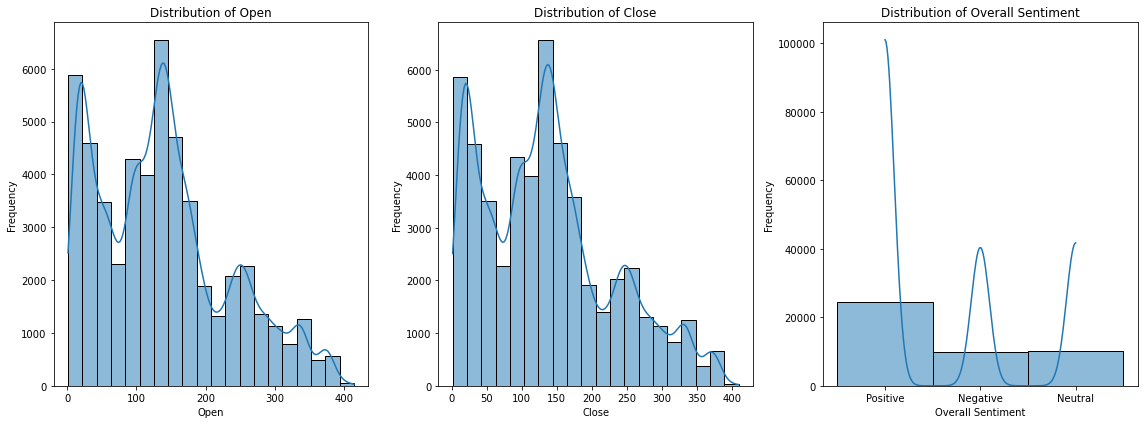

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_num contains multiple columns you want to plot
columns_to_plot = ['Open', 'Close', 'Overall Sentiment']  # Replace these with your actual column names

num_columns = len(columns_to_plot)
fig, axes = plt.subplots(1, num_columns, figsize=(16, 6))  # Adjust the figsize as needed

for i, column in enumerate(columns_to_plot):
    sns.histplot(df[column], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()  # Adjust subplots to prevent overlap
plt.show()


In [161]:
## replace null values with Median
import numpy as np

df['Open'] = df['Open'].fillna(df['Open'].median())
df['Close'] = df['Close'].fillna(df['Close'].median())

In [162]:
df.head(2)

,url,softTitle,title,date,author,description,keywords,text,Article Length,Combined Authors,...,Date,Stock,Open,Low,Close,Adjusted_Close,Volume,Month,Price_Change_Pct,Adjusted_Close_Change
0,https://www.cnbc.com/select/best-balance-trans...,11 best balance transfer cards with 0% APR of ...,11 best balance transfer cards with 0% APR of ...,2019-10-15,"Jason Stauffer,Brett Holzhauer",We analyzed 101 balance transfer cards using a...,"Approved for Apple,Select_Cards,Select_Monetiz...",Who's this for: The Citi Simplicity® Card has ...,1133.0,"Jason Stauffer,Brett Holzhauer",...,2019-10-15,AAPL,59.412498,58.720001,58.830002,57.142513,87360000.0,10.0,-0.233174,-0.002332
1,https://www.cnbc.com/select/best-balance-trans...,11 best balance transfer cards with 0% APR of ...,11 best balance transfer cards with 0% APR of ...,2019-10-15,"Jason Stauffer,Brett Holzhauer",We analyzed 101 balance transfer cards using a...,"Approved for Apple,Select_Cards,Select_Monetiz...",Who's this for: The Citi Simplicity® Card has ...,1133.0,"Jason Stauffer,Brett Holzhauer",...,2019-10-15,AMZN,88.822502,87.030998,88.369003,88.369003,62234000.0,10.0,1.782393,0.017824


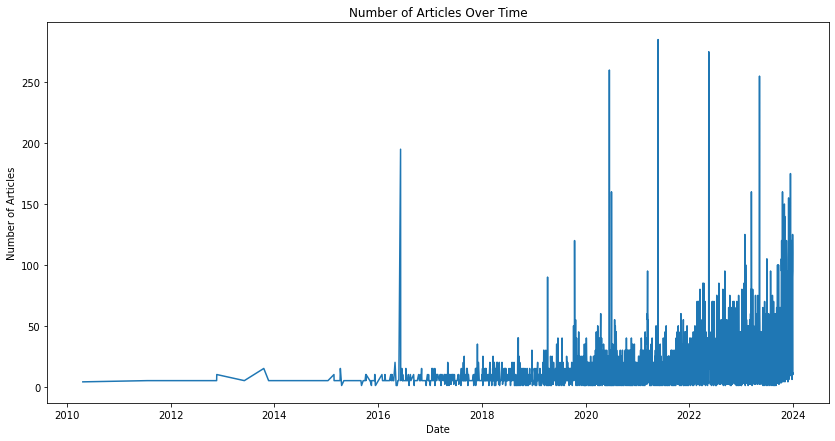

In [163]:
import pandas as pd

# Assuming 'df' is your DataFrame
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Now that 'date' is in datetime format, group by date (without time component) and count the articles
articles_over_time_filtered = df.groupby(df['date'].dt.date).size()

# If you're plotting, ensure to include the plotting library and use the correct plotting commands
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
articles_over_time_filtered.plot(kind='line')  # Assuming you want a line plot
plt.title('Number of Articles Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()


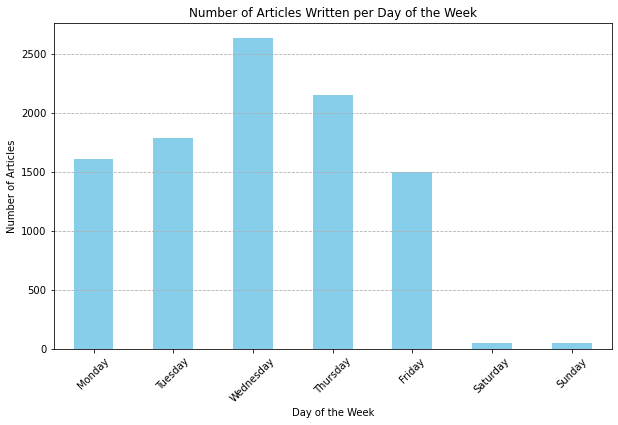

In [164]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_text_simplified is your articles DataFrame and 'date' is the column with article dates
# Convert 'date' to datetime if it's not already
df_text['date'] = pd.to_datetime(df['date'])

# Extract the day of the week (Monday=0, Sunday=6)
df_text['day_of_week'] = df_text['date'].dt.dayofweek

# Map the day of the week to actual day names for clarity in the plot
day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df_text['day_name'] = df_text['day_of_week'].map(day_map)

# Aggregate articles by day of the week
articles_per_day = df_text.groupby('day_name').size().reindex(day_map.values())

# Plotting
plt.figure(figsize=(10, 6))
articles_per_day.plot(kind='bar', color='skyblue')
plt.title('Number of Articles Written per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()


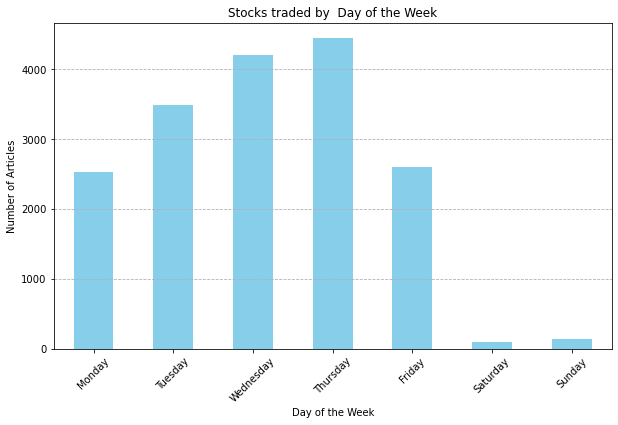

In [165]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_text_simplified is your articles DataFrame and 'date' is the column with article dates
# Convert 'date' to datetime if it's not already
df_stocks['date'] = pd.to_datetime(df['date'])

# Extract the day of the week (Monday=0, Sunday=6)
df_stocks['day_of_week'] = df_stocks['date'].dt.dayofweek

# Map the day of the week to actual day names for clarity in the plot
day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df_stocks['day_name'] = df_stocks['day_of_week'].map(day_map)

# Aggregate articles by day of the week
articles_per_day = df_stocks.groupby('day_name').size().reindex(day_map.values())

# Plotting
plt.figure(figsize=(10, 6))
articles_per_day.plot(kind='bar', color='skyblue')
plt.title('Stocks traded by  Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()


Weekend activity 

In [174]:
# Alternatively, if you used 'day_name':
weekend_articles = df_text[(df_text['day_name'] == 'Saturday') | (df_text['day_name'] == 'Sunday')]

# Display the filtered rows
len(weekend_articles)


92

In [173]:
# Alternatively, if you used 'day_name':
weekend_articles = df_stocks[(df_stocks['day_name'] == 'Saturday') | (df_stocks['day_name'] == 'Sunday')]

# Display the filtered rows
len(weekend_articles)


238

#### Null Values

In [168]:
def nulls_summary_table(df):
    """
    Returns a summary table showing null value counts and percentage

    Parameters:
    df (DataFrame): Dataframe to check

    Returns:
    
    null_values (DataFrame)
    """
    null_values = pd.DataFrame(df.isnull().sum())
    null_values[1] = null_values[0]/len(df)
    null_values.columns = ['null_count','null_pct']
    return null_values

nulls_summary_table(df)

,null_count,null_pct
url,9279,0.172948
softTitle,9279,0.172948
title,9279,0.172948
date,9279,0.172948
author,9279,0.172948
description,9279,0.172948
keywords,9279,0.172948
text,9279,0.172948
Article Length,9279,0.172948
Combined Authors,9279,0.172948


In [169]:
# Filter the DataFrame to only include rows where any column has a null value
df_with_nulls = df[df.isnull().any(axis=1)]




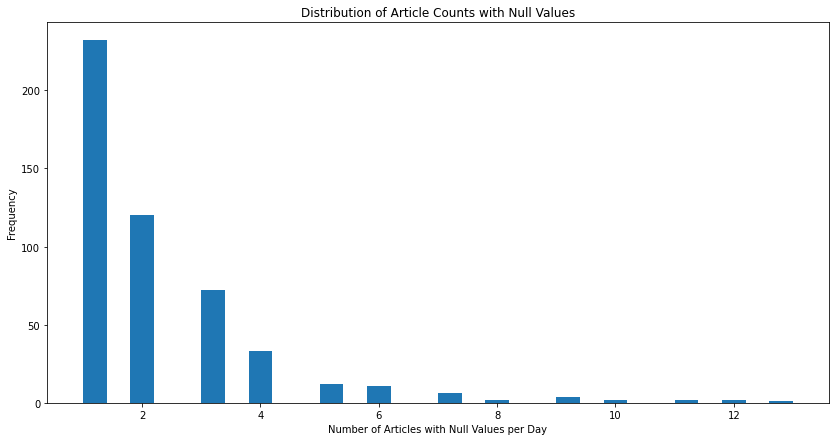

In [180]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df_with_nulls' is your DataFrame and it already has a 'date' column in datetime format
# Group by date (without time component) and count the articles
articles_over_time_filtered = df_with_nulls.groupby(df_with_nulls['date'].dt.date).size()

# Plotting
plt.figure(figsize=(14, 7))
articles_over_time_filtered.plot(kind='hist', bins=30)  # Adjust 'bins' as needed for granularity
plt.title('Distribution of Article Counts with Null Values')
plt.xlabel('Number of Articles with Null Values per Day')
plt.ylabel('Frequency')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_text_simplified is your articles DataFrame and 'date' is the column with article dates
# Convert 'date' to datetime if it's not already
df_stocks['date'] = pd.to_datetime(df['date'])

# Extract the day of the week (Monday=0, Sunday=6)
df_stocks['day_of_week'] = df_stocks['date'].dt.dayofweek

# Map the day of the week to actual day names for clarity in the plot
day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df_stocks['day_name'] = df_stocks['day_of_week'].map(day_map)

# Aggregate articles by day of the week
articles_per_day = df_stocks.groupby('day_name').size().reindex(day_map.values())

# Plotting
plt.figure(figsize=(10, 6))
articles_per_day.plot(kind='bar', color='skyblue')
plt.title('Stocks traded by  Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()


In [170]:
df_with_nulls.to_csv('data/df_with_nulls.csv')

In [181]:
df_with_nulls.head()

,url,softTitle,title,date,author,description,keywords,text,Article Length,Combined Authors,...,Date,Stock,Open,Low,Close,Adjusted_Close,Volume,Month,Price_Change_Pct,Adjusted_Close_Change
645,https://www.cnbc.com/select/event-ticket-insur...,What is event ticket insurance and is it worth...,What is event ticket insurance and is it worth...,2023-07-09,Ira Wilder,Tickets to live events like concerts can be ex...,"Insurance industry,Select: Insurance,Event pro...",I was once a dedicated purchaser of ticket ins...,1283.0,Ira Wilder,...,NaN,NaN,131.399994,NaN,129.770004,NaN,NaN,NaN,NaN,NaN
646,https://www.cnbc.com/2023/07/09/heres-how-one-...,Here's how one single father spent a decade pl...,Here's how one single father spent a decade pl...,2023-07-09,"Kate Dore, CFP®",This man spent a decade planning for a baby th...,"LGBT adoption,LGBT,Labor economy,Personnel,Soc...","There are many paths to parenthood, and the jo...",732.0,"Kate Dore, CFP®",...,NaN,NaN,131.399994,NaN,129.770004,NaN,NaN,NaN,NaN,NaN
647,https://www.cnbc.com/2023/07/09/how-a-norway-2...,28-year-old social media manager in Norway is ...,28-year-old social media manager in Norway is ...,2023-07-09,Jennifer Liu,Lene Vindenes is a social media manager in Nor...,No Keywords,"The summer travel season is in full swing, and...",646.0,Jennifer Liu,...,NaN,NaN,131.399994,NaN,129.770004,NaN,NaN,NaN,NaN,NaN
833,https://www.cnbc.com/select/how-to-check-the-s...,How to check the status of your tax refund,How to check the status of your tax refund,2021-04-03,Megan DeMatteo,Still awaiting your 2021 tax refund? The IRS o...,"Consumer spending,Select_Advice,Approved for A...",If you're still waiting on your tax return to ...,382.0,Megan DeMatteo,...,NaN,NaN,131.399994,NaN,129.770004,NaN,NaN,NaN,NaN,NaN
1249,https://www.cnbc.com/select/what-are-etfs-shou...,What are ETFs and should you invest in them?,What are ETFs and should you invest in them?,2021-09-18,Elizabeth Gravier,ETFs trade like stocks but offer much more div...,"Approved for Apple,Select: Investing,Consumer ...",There are so many ways to invest your money to...,546.0,Elizabeth Gravier,...,NaN,NaN,131.399994,NaN,129.770004,NaN,NaN,NaN,NaN,NaN


In [171]:
df.isnull().sum()

url                      9279
softTitle                9279
title                    9279
date                     9279
author                   9279
description              9279
keywords                 9279
text                     9279
Article Length           9279
Combined Authors         9279
Sentiment Scores         9279
Compound Score           9279
Overall Sentiment        9279
Month-Year               9279
Sentiment Score          9279
Processed Description    9279
Date                     1119
Stock                    1119
Open                        0
Low                      1119
Close                       0
Adjusted_Close           1119
Volume                   1119
Month                    1119
Price_Change_Pct         1119
Adjusted_Close_Change    1119
dtype: int64

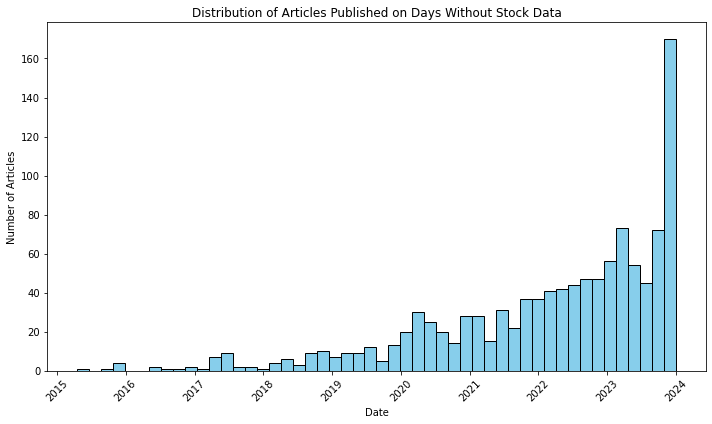

In [182]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the merged data
filtered_dataset = df[df['Stock'].isnull()]
dates_with_null_stock = filtered_dataset['date']

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(dates_with_null_stock, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Articles Published on Days Without Stock Data')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


delete all the days where an aritlces wan't published 

also figure out how to ttake care of thet null values